# **Membentuk Model Linear Regresi**

In [9]:
# Import libraries yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import matplotlib.pyplot as plt
import seaborn as sns
pyplot.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

Dataset : Kumpulan data pribadi biaya medis.


In [10]:
# Membaca dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [12]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


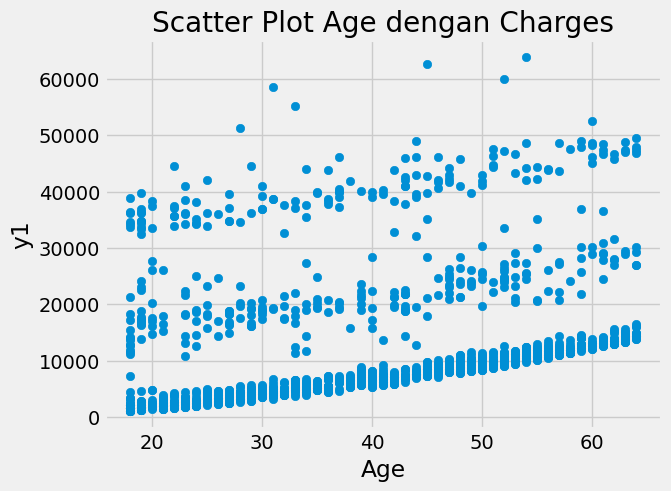

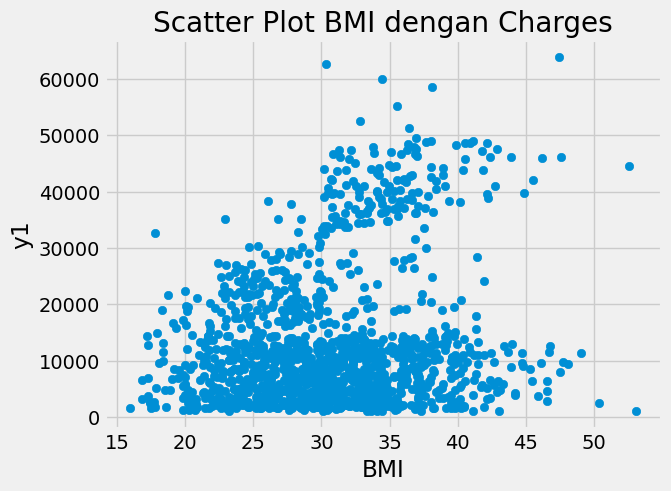

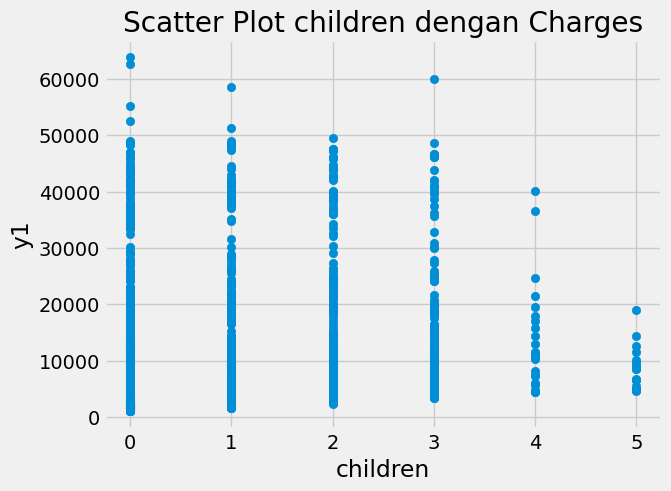

In [13]:
# memunculkan scatter plot

# kolom age
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('y1')
plt.title('Scatter Plot Age dengan Charges')
plt.show()

# kolom BMI
plt.scatter(df['bmi'],df['charges'])
plt.xlabel('BMI')
plt.ylabel('y1')
plt.title('Scatter Plot BMI dengan Charges')
plt.show()

# kolom children
plt.scatter(df['children'],df['charges'])
plt.xlabel('children')
plt.ylabel('y1')
plt.title('Scatter Plot children dengan Charges')
plt.show()


# Hitung Korelasi menggunakan Heatmap



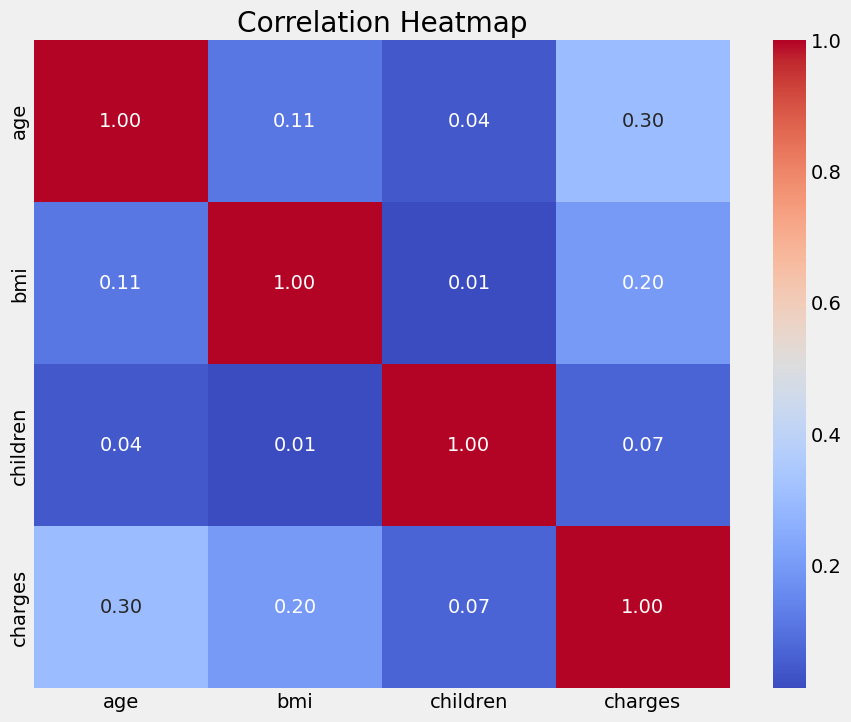

In [14]:
# Korelasi menggunakan heatmap

numerical_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Penjelasan :

Warna merah menyatakan korelasi tinggi yang berarti memiliki hubungan yang signifikan terhadap variabel independen.

Warna biru menyatakan korelasi rendah atau hampir tidak ada korelasi yang berarti variabel tersebut tidak memiliki hubungan yang signifikan terhadap variabel independen


Interpretasi :

Korelasi tertinggi didapatkan antara age dan charges memiliki korelasi sebesar 0,30 (korelasi positif rendah). dan korelasi terendah didapatkan pada bmi dan children yaitu sebesar 0,01(hampir tidak ada korelasi).

# Model Regresi Linear berganda dan dummy

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder

# Ubah data kategorik menjadi numerik
categorical_columns = ['sex', 'smoker', 'region']
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_columns])
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns))

# Gabung varaiabel yang berisikan kategorik dan numerik
numerical_columns = ['age', 'bmi', 'children']
X = pd.concat([df[numerical_columns], encoded_df], axis=1)
y = df['charges']

# Pisahkan kumpulan data menjadi kumpulan pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

formula = 'charges ~ ' + ' + '.join(X.columns)

# Fit Model regrese linier
model = smf.ols(formula=formula, data=pd.concat([X_train, y_train], axis=1)).fit()

# Tampilkan hasil
ols_summary = model.summary()
print(ols_summary)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.32e-305
Time:                        13:54:05   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.193e+04   1114.505  

#**Hasil Model Regresi linier berganda**

**Y = -1.193 + 256.9757(x1) + 337.0926(x2) + 425.2788(x3) - 18.5917(x4_male) + 2.365(x5_perokok) - 370.6773(x6_northwest)**


In [16]:
# Membentuk nilai prediksi
prediksi = model.predict(X)
prediksi.head()

,0
0,25197.531061
1,3826.781929
2,6987.535290
3,3813.396616
4,5637.967419


In [17]:
# Membentuk nilai residual
residual = y - prediksi
residual.head()

,0
0,-8312.607061
1,-2101.229629
2,-2538.073290
3,18171.073994
4,-1771.112219


In [18]:
from scipy.stats import f

# Interpretasi uji F
alpha = 0.05  # Tingkat signifikansi

# F-statistic dan derajat bebas
fhitung = model.fvalue  # F-statistik dari model
df1 = X.shape[1] - 1  # Derajat bebas pembilang (jumlah variabel independen)
df2 = X.shape[0] - df1 - 1  # Derajat bebas penyebut (jumlah sampel - jumlah variabel - 1)

# Menghitung F-tabel
ftabel = f.ppf(1 - alpha, df1, df2)

# Output hasil
print('Nilai F tabel:', ftabel)
print('Nilai F hitung :', fhitung)

# menentukan titik kritis pengujian
if fhitung > ftabel:
    print("Karena F-hitung > F-tabel, maka H0 ditolak. Artinya, minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.")
else:
    print("Karena F-hitung < F-tabel, maka H0 gagal ditolak. Artinya, tidak ada variabel independen yang berpengaruh signifikan terhadap variabel dependennya.")

Nilai F tabel: 2.016451675441061
Nilai F hitung : 380.87921310795014
Karena F-hitung > F-tabel, maka H0 ditolak. Artinya, minimal ada satu variabel independen yang berpengaruh terhadap variabel dependennya.


# Uji F
1. Menentukan hipotesis

*   H0 : Beta1 = Beta2 = 0
*   H1 : minimal ada satu Betaj yang tidak sama dengan 0, dimana j = 1, 2

2. Menentukan tingkat signifikansi
  
  Tingkat signifikansi sebesar 5% atau 0,05

3. Menentukan Uji statistik F

  Pada Hasil perhitungan diatas, didapatkan Nilai P-value sebesar **380.87**

4. Menentukan titik kritis pengujian

  Dengan alpha sebesar 0,05, H0 ditolak jika Fhit > Ftabel dimana F tabel = 2.01 = atau p-Value < 0.05

5. Menentukan Kesimpulan

  Dengan alpha sebesar 0,05, nilai Fhit = 380.87 > Ftabel = 2.01 berdasarkan hal itu maka dapat disimpulkan bahwa **H0 ditolak** yang artinya minimal ada satu variabel independen yang berpengaruh terhadap variabel independennya.

In [19]:
# Hitung SSE (Sum of Squared Errors) dan SSR (Sum of Squared Regression)
SSE = np.sum(residual**2)
SSR = np.sum((prediksi - y.mean())**2)
SST = SSR + SSE #SST (Total Sum of Squares)

# Hitung R-squared
r_squared = SSR / SST

print(f"SSE: {SSE}")
print(f"SSR: {SSR}")
print(f"SST: {SST}")
print(f"R-squared: {r_squared}")

# Interpretasi R-squared
print("\nInterpretasi R-squared:")
if r_squared > 0.7 :
  print("Nilai R-squared tinggi, model memiliki ketepatan yang baik dalam memprediksi variabel dependen.")
elif r_squared > 0.4:
  print("Nilai R-squared cukup tinggi, model memiliki ketepatan yang lumayan baik dalam memprediksi variabel dependen.")
elif r_squared > 0.1:
  print("Nilai R-squared rendah, model memiliki ketepatan yang kurang baik dalam memprediksi variabel dependen.")
else :
  print("Nilai R-squared sangat rendah, model tidak memiliki ketepatan yang baik dalam memprediksi variabel dependen.")

SSE: 48891092869.32485
SSR: 145481791509.35077
SST: 194372884378.67563
R-squared: 0.7484675240293516

Interpretasi R-squared:
Nilai R-squared tinggi, model memiliki ketepatan yang baik dalam memprediksi variabel dependen.


In [20]:
# Hitung R-squared yang disesuaikan (Adjusted R-squared)
n = len(y)  # Jumlah observasi
p = X.shape[1]  # Jumlah variabel prediktor

adjusted_r_squared = 1 - ( (1 - r_squared) * (n - 1) / (n - p - 1))
print(f"Adjusted R-squared: {adjusted_r_squared}")

# Interpretasi Adjusted R-squared
print("\nInterpretasi Adjusted R-squared:")
if adjusted_r_squared > 0.7 :
  print("Nilai Adjusted R-squared tinggi, model memiliki ketepatan yang baik dalam memprediksi variabel dependen.")
elif adjusted_r_squared > 0.4:
  print("Nilai Adjusted R-squared cukup tinggi, model memiliki ketepatan yang lumayan baik dalam memprediksi variabel dependen.")
elif adjusted_r_squared > 0.1:
  print("Nilai Adjusted R-squared rendah, model memiliki ketepatan yang kurang baik dalam memprediksi variabel dependen.")
else :
  print("Nilai Adjusted R-squared sangat rendah, model tidak memiliki ketepatan yang baik dalam memprediksi variabel dependen.")

Adjusted R-squared: 0.7469534082973989

Interpretasi Adjusted R-squared:
Nilai Adjusted R-squared tinggi, model memiliki ketepatan yang baik dalam memprediksi variabel dependen.


In [21]:
import pandas as pd
import scipy.stats as stats

# Menentukan kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(f"Kolom numerik dalam dataset: {list(numeric_columns)}")

# Parameter pengujian
mu = 100  # Hipotesis rata-rata
alpha = 0.05  # Tingkat signifikansi
z_tabel = stats.norm.ppf(1 - alpha / 2)  # Nilai kritikal z untuk uji dua sisi

# Fungsi untuk melakukan uji-z pada kolom tertentu
def perform_z_test(column):
    sample_mean = df[column].mean()
    sample_std = df[column].std()
    n = len(df[column])

    # Menghitung z-statistik dan p-value
    z_stat = (sample_mean - mu) / (sample_std / (n ** 0.5))
    p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

    # Menentukan keputusan
    decision = "H0 ditolak" if abs(z_stat) > z_tabel else "H0 gagal ditolak"

    return {
        'Variabel': column,
        'Rata-rata Sampel': round(sample_mean, 2),
        'Z-Statistik': round(z_stat, 3),
        'Z-Tabel': round(z_tabel, 3),
        'P-Value': round(p_value, 5),
        'Keputusan': decision
    }

# Iterasi untuk semua kolom numerik dan menyimpan hasil
results = [perform_z_test(col) for col in numeric_columns]

# Menampilkan hasil
print("\nHasil Pengujian Hipotesis (dengan Z-Tabel):")
for result in results:
    print(
        f"Variabel: {result['Variabel']}, Z-Statistik: {result['Z-Statistik']}, "
        f"Z-Tabel: {result['Z-Tabel']}, P-Value: {result['P-Value']}, Keputusan: {result['Keputusan']}"
    )


Kolom numerik dalam dataset: ['age', 'bmi', 'children', 'charges']

Hasil Pengujian Hipotesis (dengan Z-Tabel):
Variabel: age, Z-Statistik: -158.273, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H0 ditolak
Variabel: bmi, Z-Statistik: -415.901, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H0 ditolak
Variabel: children, Z-Statistik: -3001.111, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H0 ditolak
Variabel: charges, Z-Statistik: 39.782, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H0 ditolak


Uji z

1. Pengujian hipotesis
*   H0 : Tidak ada perbedaan, atau parameter populasi sama dengan nilai tertentu.
*   H1 : Ada perbedaan, atau parameter populasi berbeda dari nilai tertentu.

2. Menentukan tingkat signifikansi

  Tingkat signifikansinya 5% atau alpha sebesar 0.05

3. Menghitung uji z

* Variabel: age, Z-Statistik: -158.273
* Variabel: bmi, Z-Statistik: -415.901
* Variabel: children, Z-Statistik: -3001.111
* Variabel: charges, Z-Statistik: 39.782

4. Menentukan titik kritis pengujian

* Variabel: age, Z-Statistik: -158.273, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H0 ditolak
* Variabel: bmi, Z-Statistik: -415.901, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H0 ditolak
* Variabel: children, Z-Statistik: -3001.111, Z-Tabel: 1.96, P-Value: 0.0, Keputusan: H0 ditolak


5. Kesimpulan

* H0 ditolak pada x1(Age) yang berarti variabel memiliki perbedaan rata-rata dengan variabel independen (charges)
* H0 ditolak pada x2(bmi) yang berarti variabel memiliki perbedaan rata-rata dengan variabel independen (charges)
* H0 ditolak pada x3(children) yang berarti variabel memiliki perbedaan rata-rata dengan variabel independen (charges)


In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

# Menampilkan t-statistik dan p-value untuk setiap koefisien
t_stats = model.tvalues
p_values = model.pvalues

print("\nUji T untuk setiap koefisien:")
results = []
for var, t_stat, p_value in zip(X.columns, t_stats, p_values):
    results.append({
        "Koefisien": var,
        "t-Statistik": round(t_stat, 4),
        "P-Value": round(p_value, 4)
    })

# Menentukan tingkat signifikansi dan menghitung nilai t-tabel
alpha = 0.05
n = len(df)  # Jumlah observasi
df1 = n - X.shape[1]  # Derajat bebas (n - k)
t_tabel = stats.t.ppf(1 - alpha / 2, df1)

# Menampilkan hasil pengujian dan keputusan
print(f"\nNilai t-tabel (α = {alpha}): {t_tabel:.4f}\n")
for result in results:
    keputusan = "Tolak H0 (signifikan)" if abs(result["t-Statistik"]) > t_tabel else "Gagal Tolak H0 (tidak signifikan)"
    print(f"Koefisien {result['Koefisien']}: t-statistik = {result['t-Statistik']}, p-value = {result['P-Value']} -> {keputusan}")



Uji T untuk setiap koefisien:

Nilai t-tabel (α = 0.05): 1.9617

Koefisien age: t-statistik = -10.7054, p-value = 0.0 -> Tolak H0 (signifikan)
Koefisien bmi: t-statistik = 19.067, p-value = 0.0 -> Tolak H0 (signifikan)
Koefisien children: t-statistik = 10.3814, p-value = 0.0 -> Tolak H0 (signifikan)
Koefisien sex_male: t-statistik = 2.7499, p-value = 0.0061 -> Tolak H0 (signifikan)
Koefisien smoker_yes: t-statistik = -0.0494, p-value = 0.9606 -> Gagal Tolak H0 (tidak signifikan)
Koefisien region_northwest: t-statistik = 50.6986, p-value = 0.0 -> Tolak H0 (signifikan)
Koefisien region_southeast: t-statistik = -0.6904, p-value = 0.4901 -> Gagal Tolak H0 (tidak signifikan)
Koefisien region_southwest: t-statistik = -1.2187, p-value = 0.2232 -> Gagal Tolak H0 (tidak signifikan)


Uji t

1. Menentukan hipotesis

*   H0 : Beta1 = 0
*   H1 : Beta1 tidak sama dengan 0

2. Menentukan tingkat signifikansi

  Tingkat signifikansinya 5% atau alpha sebesar 0.05

3. Menghitung uji z

* Koefisien age: t-statistik = 19.067
* Koefisien bmi: t-statistik = 10.3814
* Koefisien children: t-statistik = 2.7499
* Koefisien sex_male: t-statistik = -0.0494
* Koefisien smoker_yes: t-statistik = 50.6986
* Koefisien region_northwest: t-statistik = -0.6904
* Koefisien region_southeast: t-statistik = -1.2187
* Koefisien region_southwest: t-statistik = -1.5131

4. Menentukan titik kritis pengujian

* Koefisien age: t-statistik = 19.067, p-value = 0.0 -> Tolak H0 (signifikan)
* Koefisien bmi: t-statistik = 10.3814, p-value = 0.0 -> Tolak H0 (signifikan)
* Koefisien children: t-statistik = 2.7499, p-value = 0.0061 -> Tolak H0 (signifikan)
* Koefisien sex_male: t-statistik = -0.0494, p-value = 0.9606 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien smoker_yes: t-statistik = 50.6986, p-value = 0.0 -> Tolak H0 (signifikan)
* Koefisien region_northwest: t-statistik = -0.6904, p-value = 0.4901 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien region_southeast: t-statistik = -1.2187, p-value = 0.2232 -> Gagal Tolak H0 (tidak signifikan)
* Koefisien region_southwest: t-statistik = -1.5131, p-value = 0.1306 -> Gagal Tolak H0 (tidak signifikan)


5. Kesimpulan

* H0 ditolak pada x1(Age) yang berarti variabel memiliki pengaruh signifikan terhadap variabel dependen (charges)
* H0 ditolak pada x2(bmi) yang berarti variabel memiliki pengaruh signifikan terhadap variabel dependen (charges)
* H0 ditolak pada x3(children) yang berarti variabel memiliki pengaruh signifikan terhadap variabel dependen (charges)
* H0 gagal ditolak pada x4(sex_male) yang berarti variabel tidak memiliki pengaruh yang signifikan terhadap variabel dependen(charges)
* H0 gagal ditolak pada x5(smoker_yes) yang berarti variabel tidak memiliki pengaruh yang signifikan terhadap variabel dependen(charges)
* H0 gagal ditolak pada x6(region_northwest) yang berarti variabel tidak memiliki pengaruh yang signifikan terhadap variabel dependen(charges)




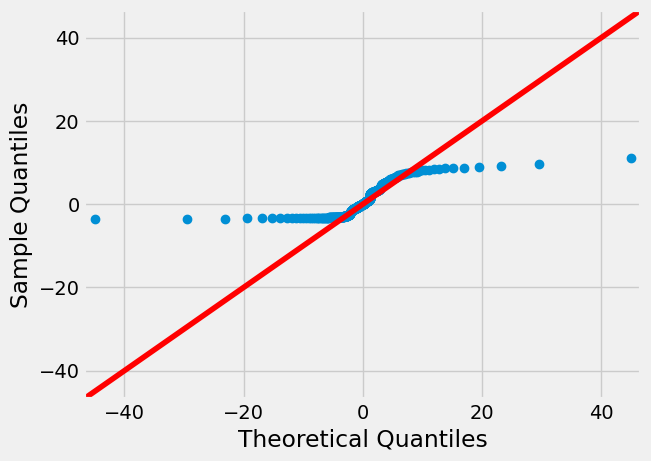

In [23]:
# memeriksa asumsi residual berdistribusi normal

import scipy.stats as stats

fig = sm.qqplot(residual, stats.t, fit = True, line = '45')
plt.show()

Gambar tidak terlihat bahwa distribusi data residual mendekati garis linier. sehingga dapat disimpulkan bahwa data residual tersebut tidak memenuhi asumsi berdistribusi normal.

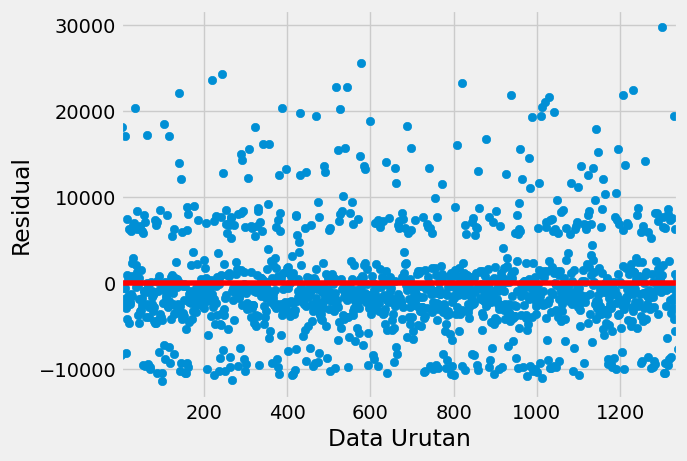

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# memeriksa asumsi residual tidak terjadi autokorelasi
n_residuals = len(residual)
urutan_pengamatan = pd.Series(range(1, n_residuals + 1))

plt.scatter(urutan_pengamatan, residual)
plt.axhline(0, color='red')
plt.xlabel('Data Urutan')
plt.ylabel('Residual')
plt.xlim(1, n_residuals + 1)
plt.show()

In [32]:
# Durbin Watson
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residual)
print(f"Durbin-Watson : {dw}")

if dw < 1.5:
    print("Ada indikasi autokorelasi positif")
elif dw > 2.5:
    print("Ada indikasi autokorelasi negatif")
else:
    print("Tidak ada indikasi autokorelasi yang signifikan")


Durbin-Watson : 2.0868242790923475
Tidak ada indikasi autokorelasi yang signifikan


Berdasarkan plot residual ini, tidak ada indikasi kuat adanya autokorelasi. Plot menunjukkan pola yang relatif acak dan tidak terstruktur, yang umumnya menunjukkan tidak adanya autokorelasi yang signifikan.

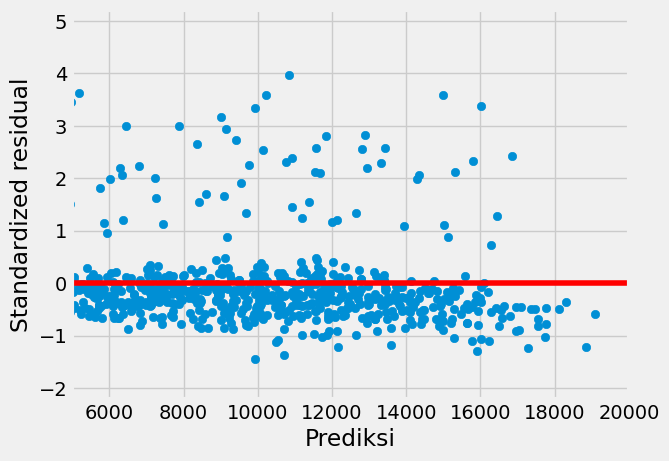

[('Lagrange multiplier statistic', 93.34462547583742),
 ('p-value', 9.720765153202845e-17),
 ('f-value', 12.675741389089819),
 ('f p-value', 1.65386597477402e-17)]

In [37]:
# memeriksa asumsi residual tidak terjadi heteroskedastisitas
influence = model.get_influence()
residual_std = influence.resid_studentized_internal

prediksi = model.fittedvalues

# Scatter Plot
plt.scatter(prediksi, residual_std)
plt.axhline(0, color='red')
plt.xlabel('Prediksi')
plt.ylabel('Standardized residual')
plt.xlim([5000, 20000])
plt.show()

# Pengujian Breush-Pagan
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)
lzip(name, test)

Karena p-value sangat kecil (mendekati nol), kita menolak hipotesis nol dengan tingkat keyakinan yang sangat tinggi. Ini berarti ada bukti kuat untuk menyimpulkan bahwa terdapat heterokedastisitas dalam model.



In [39]:
# Memeriksa apakah variabel independen memenuhi asumsi tidak terjadi multikolinieritas.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feature,VIF
0,age,7.686965
1,bmi,11.358443
2,children,1.809930
3,sex_male,2.003185
4,smoker_yes,1.261233
5,region_northwest,1.890281
6,region_southeast,2.265564
7,region_southwest,1.960745


Berdasarkan hasil diatas, nilai VIF yang lebih tinggi dari 10 hanya ada pada variabel bmi, sedangkan variabel lainnya memiliki nilai VIF yang lebih rendah dari 10. Hal ini mengindikasikan bahwa variabel independen tidak terjadi multikolinieritas
